## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
dataset = pd.read_csv('Housing.csv')

In [3]:
dataset.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [4]:
list_of_strings = dataset.iloc[:,0]
def map_(k):
  s=[]
  for i in k:
    n=float(i)
    s.append(n)
  return (s)


In [5]:
a=[]
for i in range(len(list_of_strings)):
  a.append(map_(list_of_strings[i].split()))
print(a)

[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

In [6]:
data = pd.DataFrame(data= a, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [8]:
data.shape

(505, 14)

In [9]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(505, 14)

In [14]:
dependent_variable = 'MEDV'

In [15]:
independent_variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

#Fitting into regressor

In [16]:
X = data[independent_variables]

In [17]:
y = data[dependent_variable]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
reg = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=9, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, random_state=0)

In [22]:
y_predicted = reg.predict(X_test)

In [23]:
y_predicted[:10]

array([23.10416667, 46.03043478, 16.91571429, 32.46756757, 12.22166667,
       23.10416667, 20.93980583, 12.22166667, 23.10416667, 16.91571429])

In [24]:
y_test[:10]

90     22.0
97     43.8
477    14.6
340    32.7
395    12.5
15     23.1
318    21.0
399     5.6
159    27.0
153    17.0
Name: MEDV, dtype: float64

In [25]:
data.iloc[-1]

CRIM         0.04741
ZN           0.00000
INDUS       11.93000
CHAS         0.00000
NOX          0.57300
RM           6.03000
AGE         80.80000
DIS          2.50500
RAD          1.00000
TAX        273.00000
PTRATIO     21.00000
B          396.90000
LSTAT        7.88000
MEDV        11.90000
Name: 504, dtype: float64

#Visualisation.

In [26]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

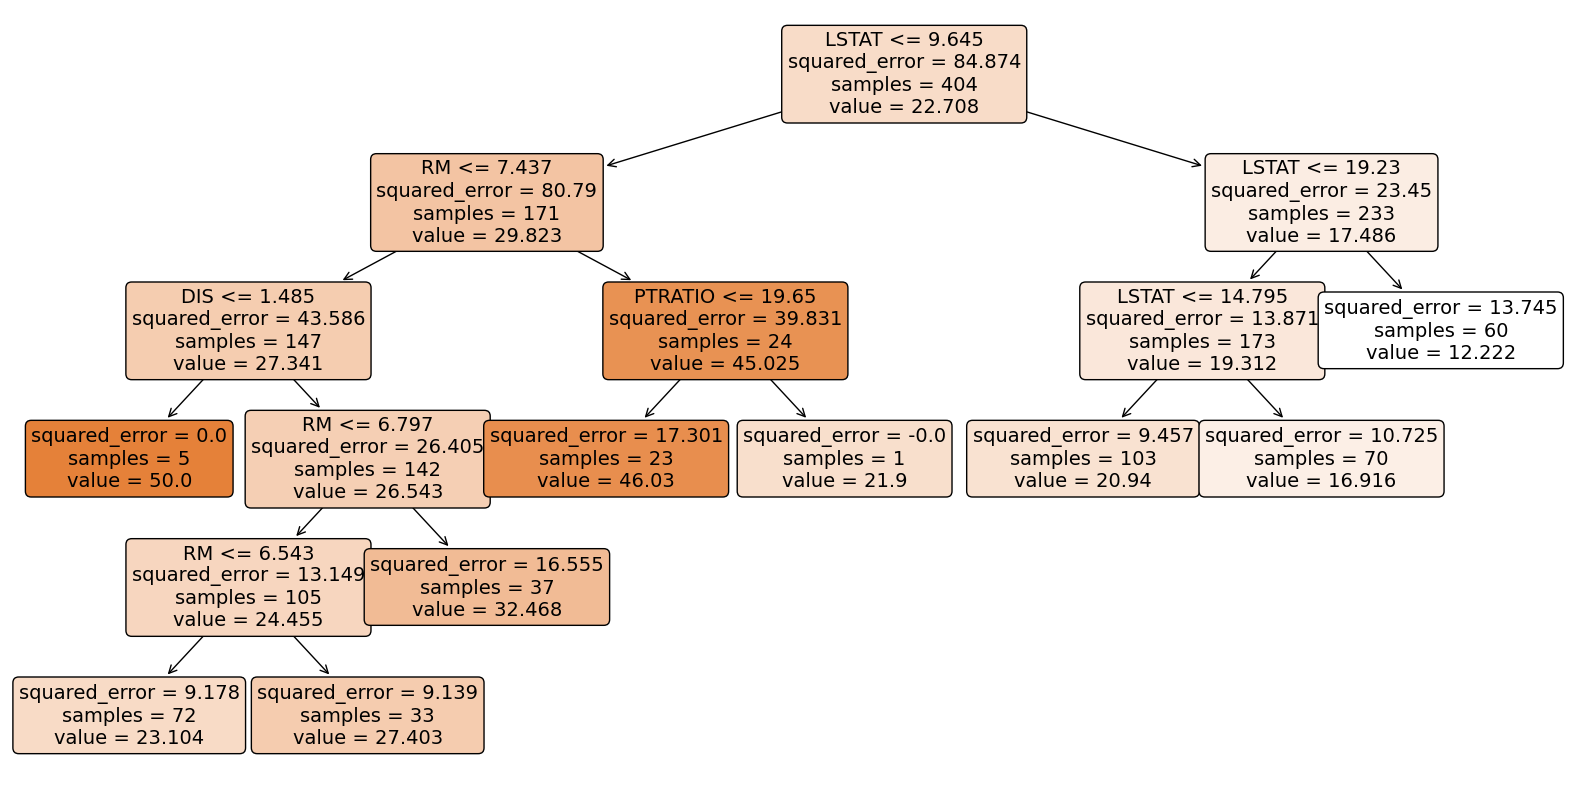

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt





# Create the plot
plt.figure(figsize=(20,10))
plot_tree(reg,
          feature_names=X_train.columns,
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          fontsize=14)

# Display the plot
plt.show()

#Regression Evaluation metrics.


In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:
#r2 train
rt2=r2_score(y_train, reg.predict(X_train))
rt2

0.8681096664945762

In [31]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.8145230928309547


In [32]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

15.354428935569095


In [33]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.9184727810167437


In [34]:
#mae
mean_absolute_error (y_test,y_predicted)

3.032323642848972

In [35]:
#MAPE
def mean_absolute_percentage_error(y_t, y_p):
    y_t, y_p = np.array(y_t), np.array(y_p)
    return np.mean(np.abs((y_t - y_p) / y_t)) * 100



mean_absolute_percentage_error(y_test,y_predicted)

17.21489687218015

In [36]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.8637133220443954 404 13


In [37]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.7868081526792583 101 13


In [38]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.69818578 0.89411783 0.69286192 0.71274303 0.60629192 0.80957205
 0.7803058  0.88709259 0.87667605 0.71917218]
Accuracy of Test Data : [0.92080585 0.87918223 0.88560077 0.76204993 0.76650058 0.82262411
 0.56854983 0.77482948 0.48438714 0.43187051]
[23.10416667 46.03043478]
